In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import (AnalyzeResample, create_sequences, import_file,
                show_k_sequences, show_original_vs_resamples, ts_stats)

PATTERN = "../non_disturbed/*.csv"
files = glob.glob(PATTERN)

ts_df = (pd.concat([import_file(file) for file in files])
            .assign(ndvi_null = lambda x: x.ndvi.isnull(),
                    id = lambda x: x.ts_id + '-' + x.groupby('ts_id').date.rank().astype('int').astype(str)))
ts_stats(ts_df)
ts_df.head()


Número de TSs: 100
Largo Promedio por TS: 1404.0
Promedio de Nulos por TS: 465.29


,date,ndvi,ts_id,ndvi_null,id
652,2000-01-03,0.553049,0024,False,0024-1
208,2000-01-11,0.615087,0024,False,0024-2
209,2000-01-27,0.599064,0024,False,0024-3
653,2000-02-20,0.596084,0024,False,0024-4
210,2000-02-28,0.673921,0024,False,0024-5


In [2]:
ts_df.date.diff().head(30)

652       NaT
208    8 days
209   16 days
653   24 days
210    8 days
654    8 days
211    8 days
212   16 days
213   16 days
214   16 days
655    8 days
215    8 days
216   16 days
656   56 days
217    8 days
218   16 days
657    8 days
219    8 days
658    8 days
220    8 days
659    8 days
221    8 days
222   16 days
223   16 days
660    8 days
224    8 days
225   16 days
226   16 days
661    8 days
227    8 days
Name: date, dtype: timedelta64[ns]

## Data Original

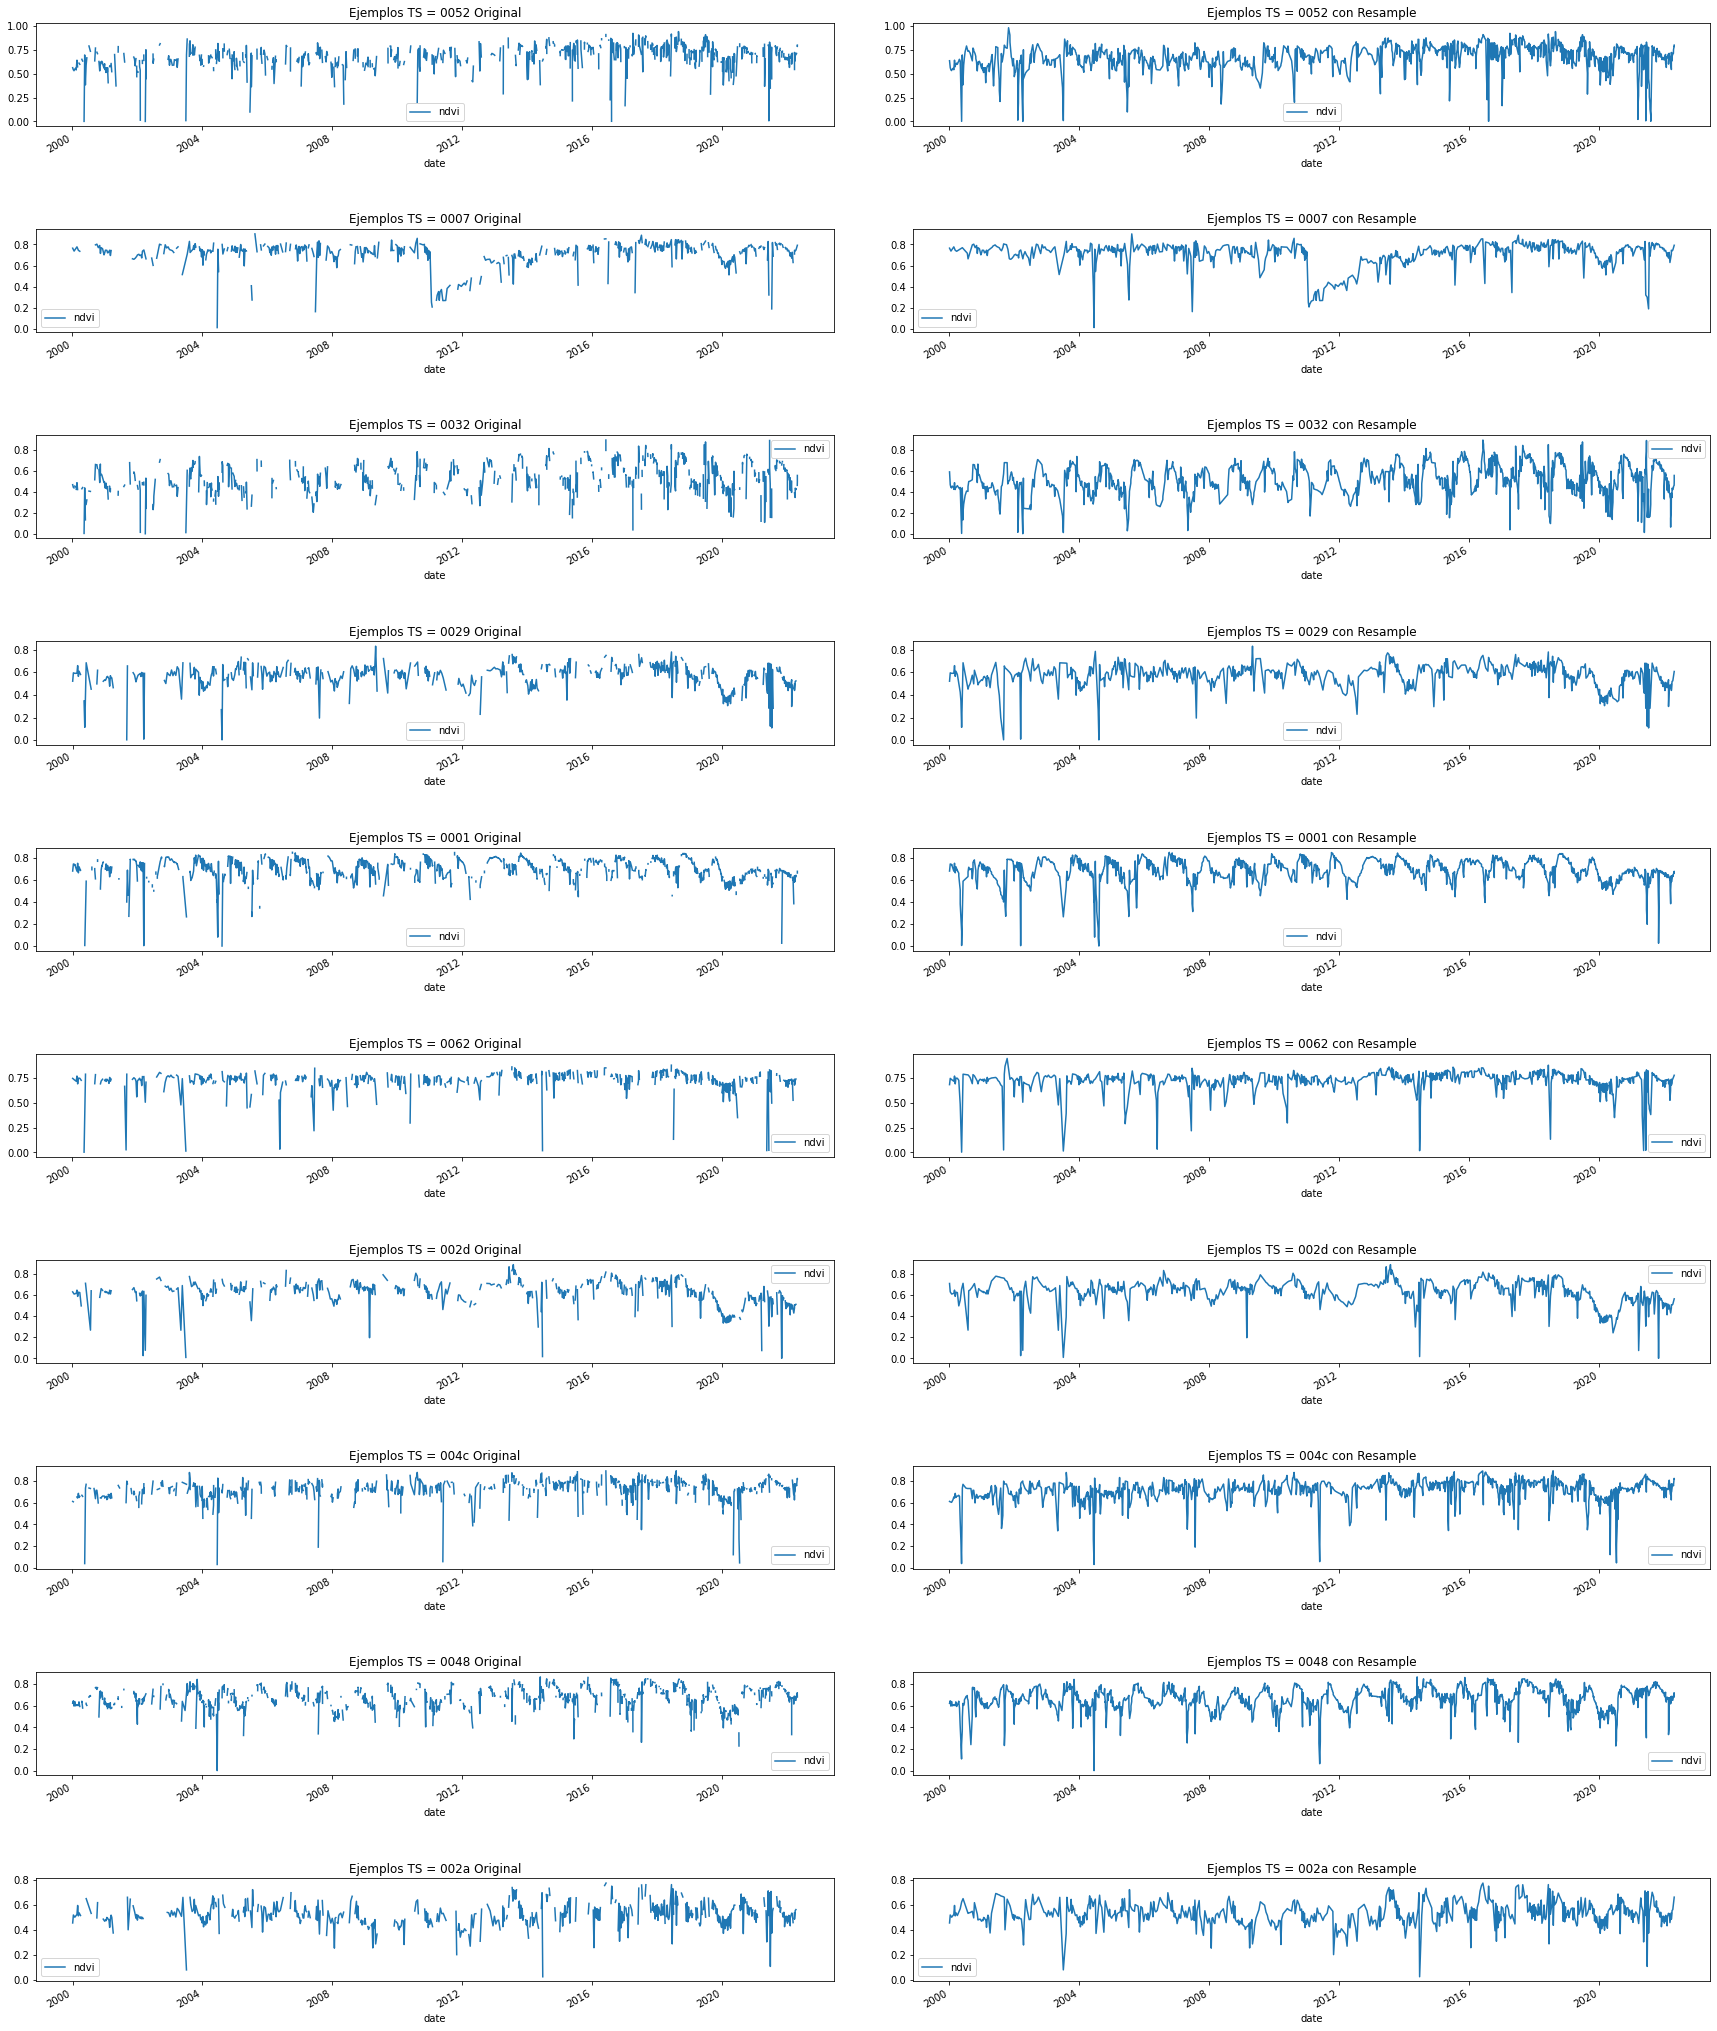

In [16]:
ts_df_inter = ts_df.interpolate()
show_original_vs_resamples(ts_df, ts_df_inter, 10)

## Análisis Semanal

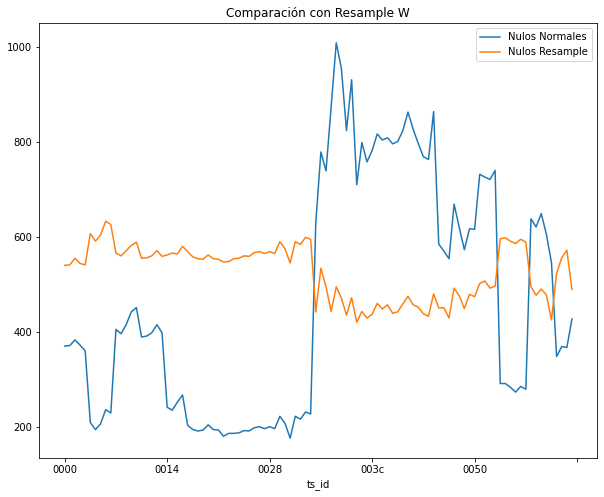

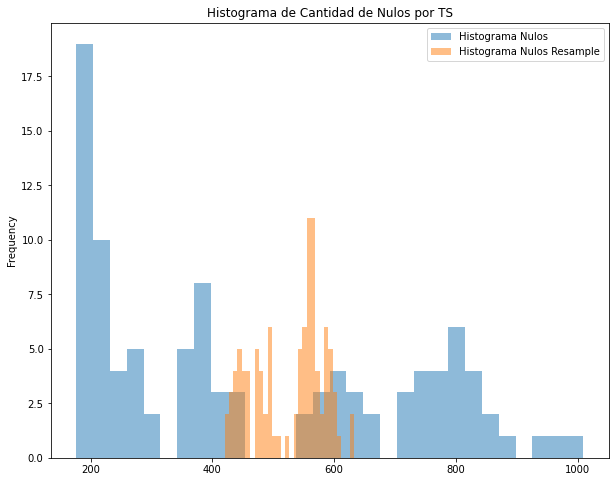

Número de TSs: 100
Largo Promedio por TS: 1164.71
Promedio de Nulos por TS: 525.75


In [3]:
analyzer = AnalyzeResample(ts_df, 'W')
ts_resample_w = analyzer.analyze()
ts_stats(ts_resample_w)


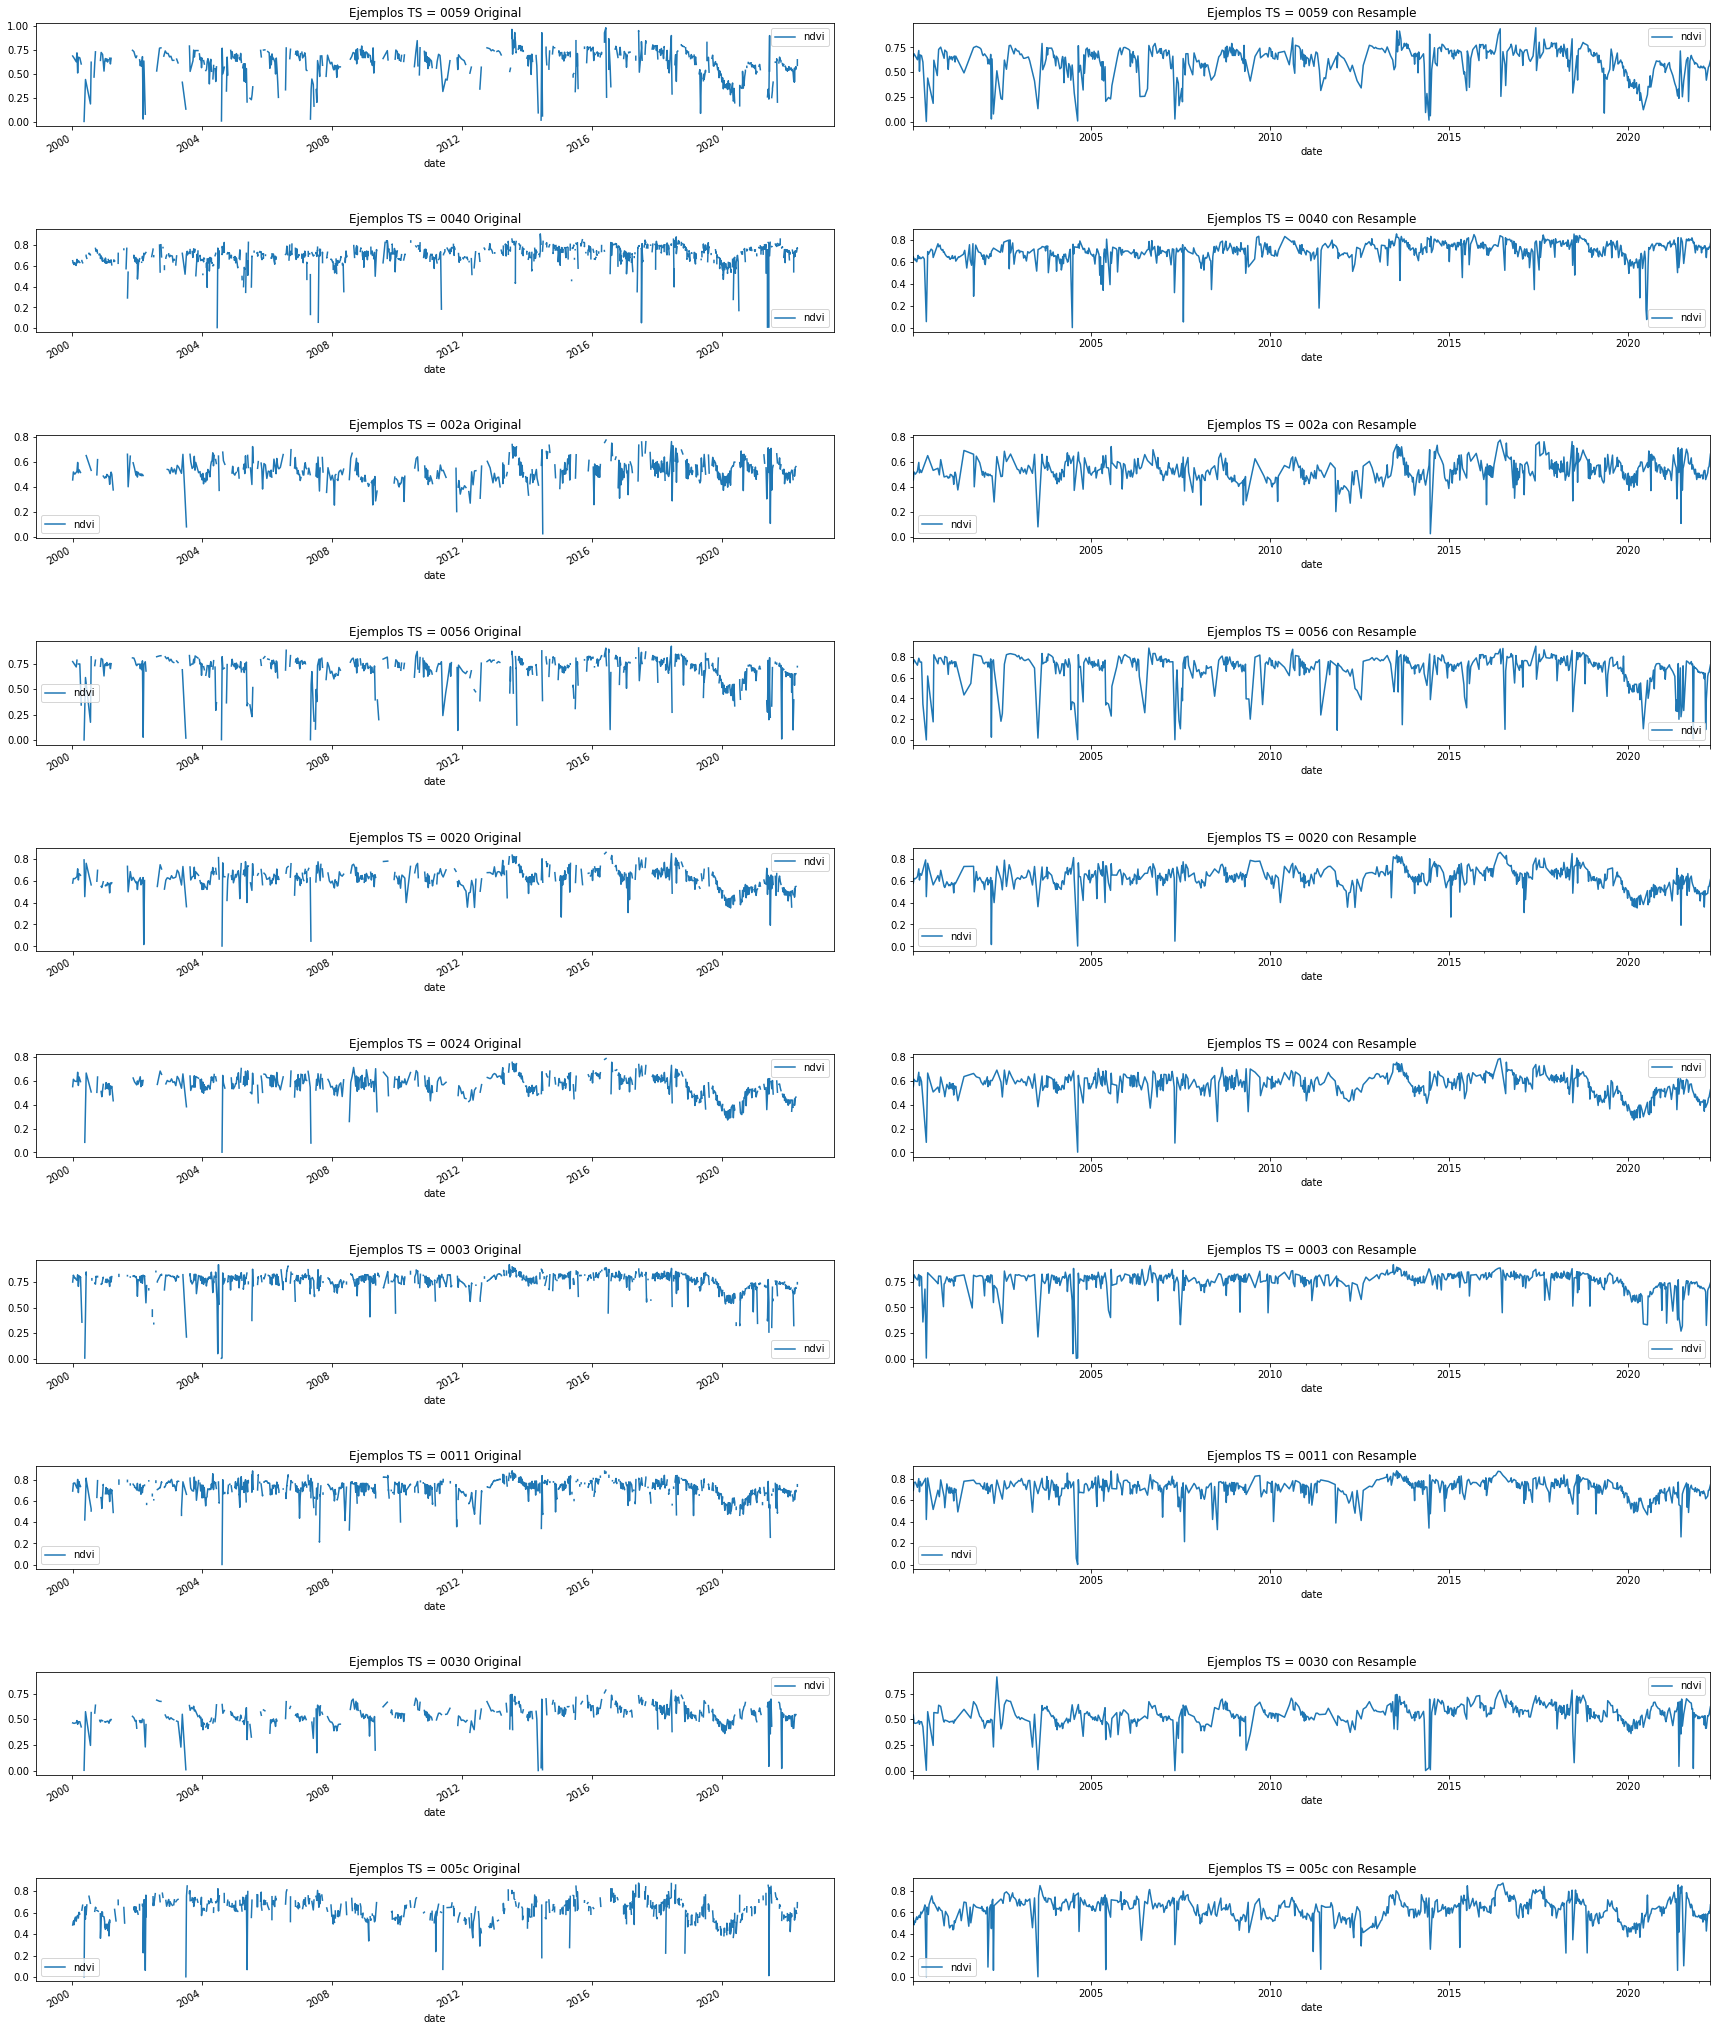

In [4]:
ts_resample_w = ts_resample_w.interpolate()
show_original_vs_resamples(ts_df, ts_resample_w, 10)

## Análisis Resample Bisemanal


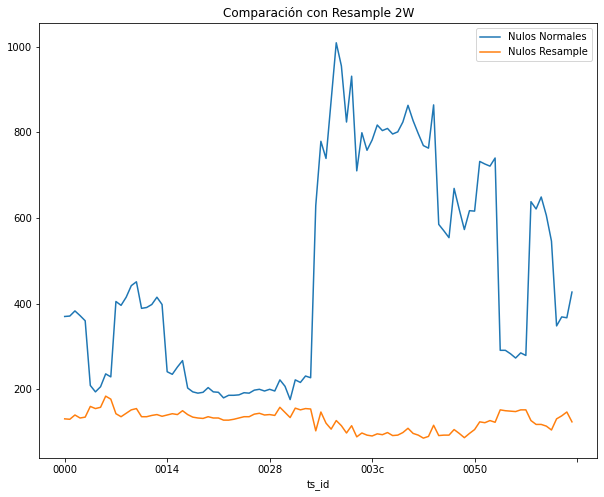

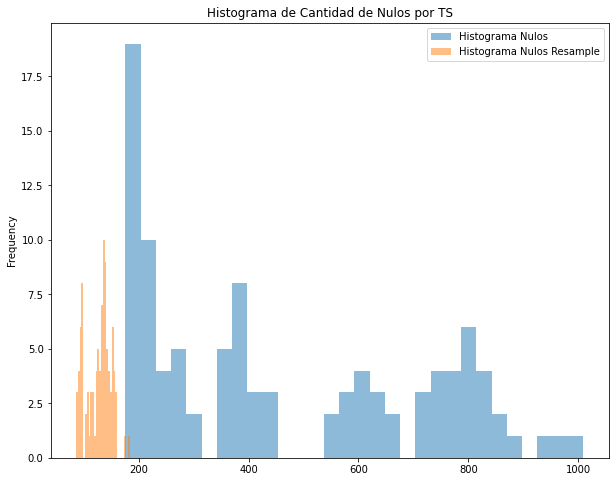

Número de TSs: 100
Largo Promedio por TS: 583.0
Promedio de Nulos por TS: 127.51


In [5]:
analyzer = AnalyzeResample(ts_df, '2W')
ts_resample_2w = analyzer.analyze()
ts_stats(ts_resample_2w)


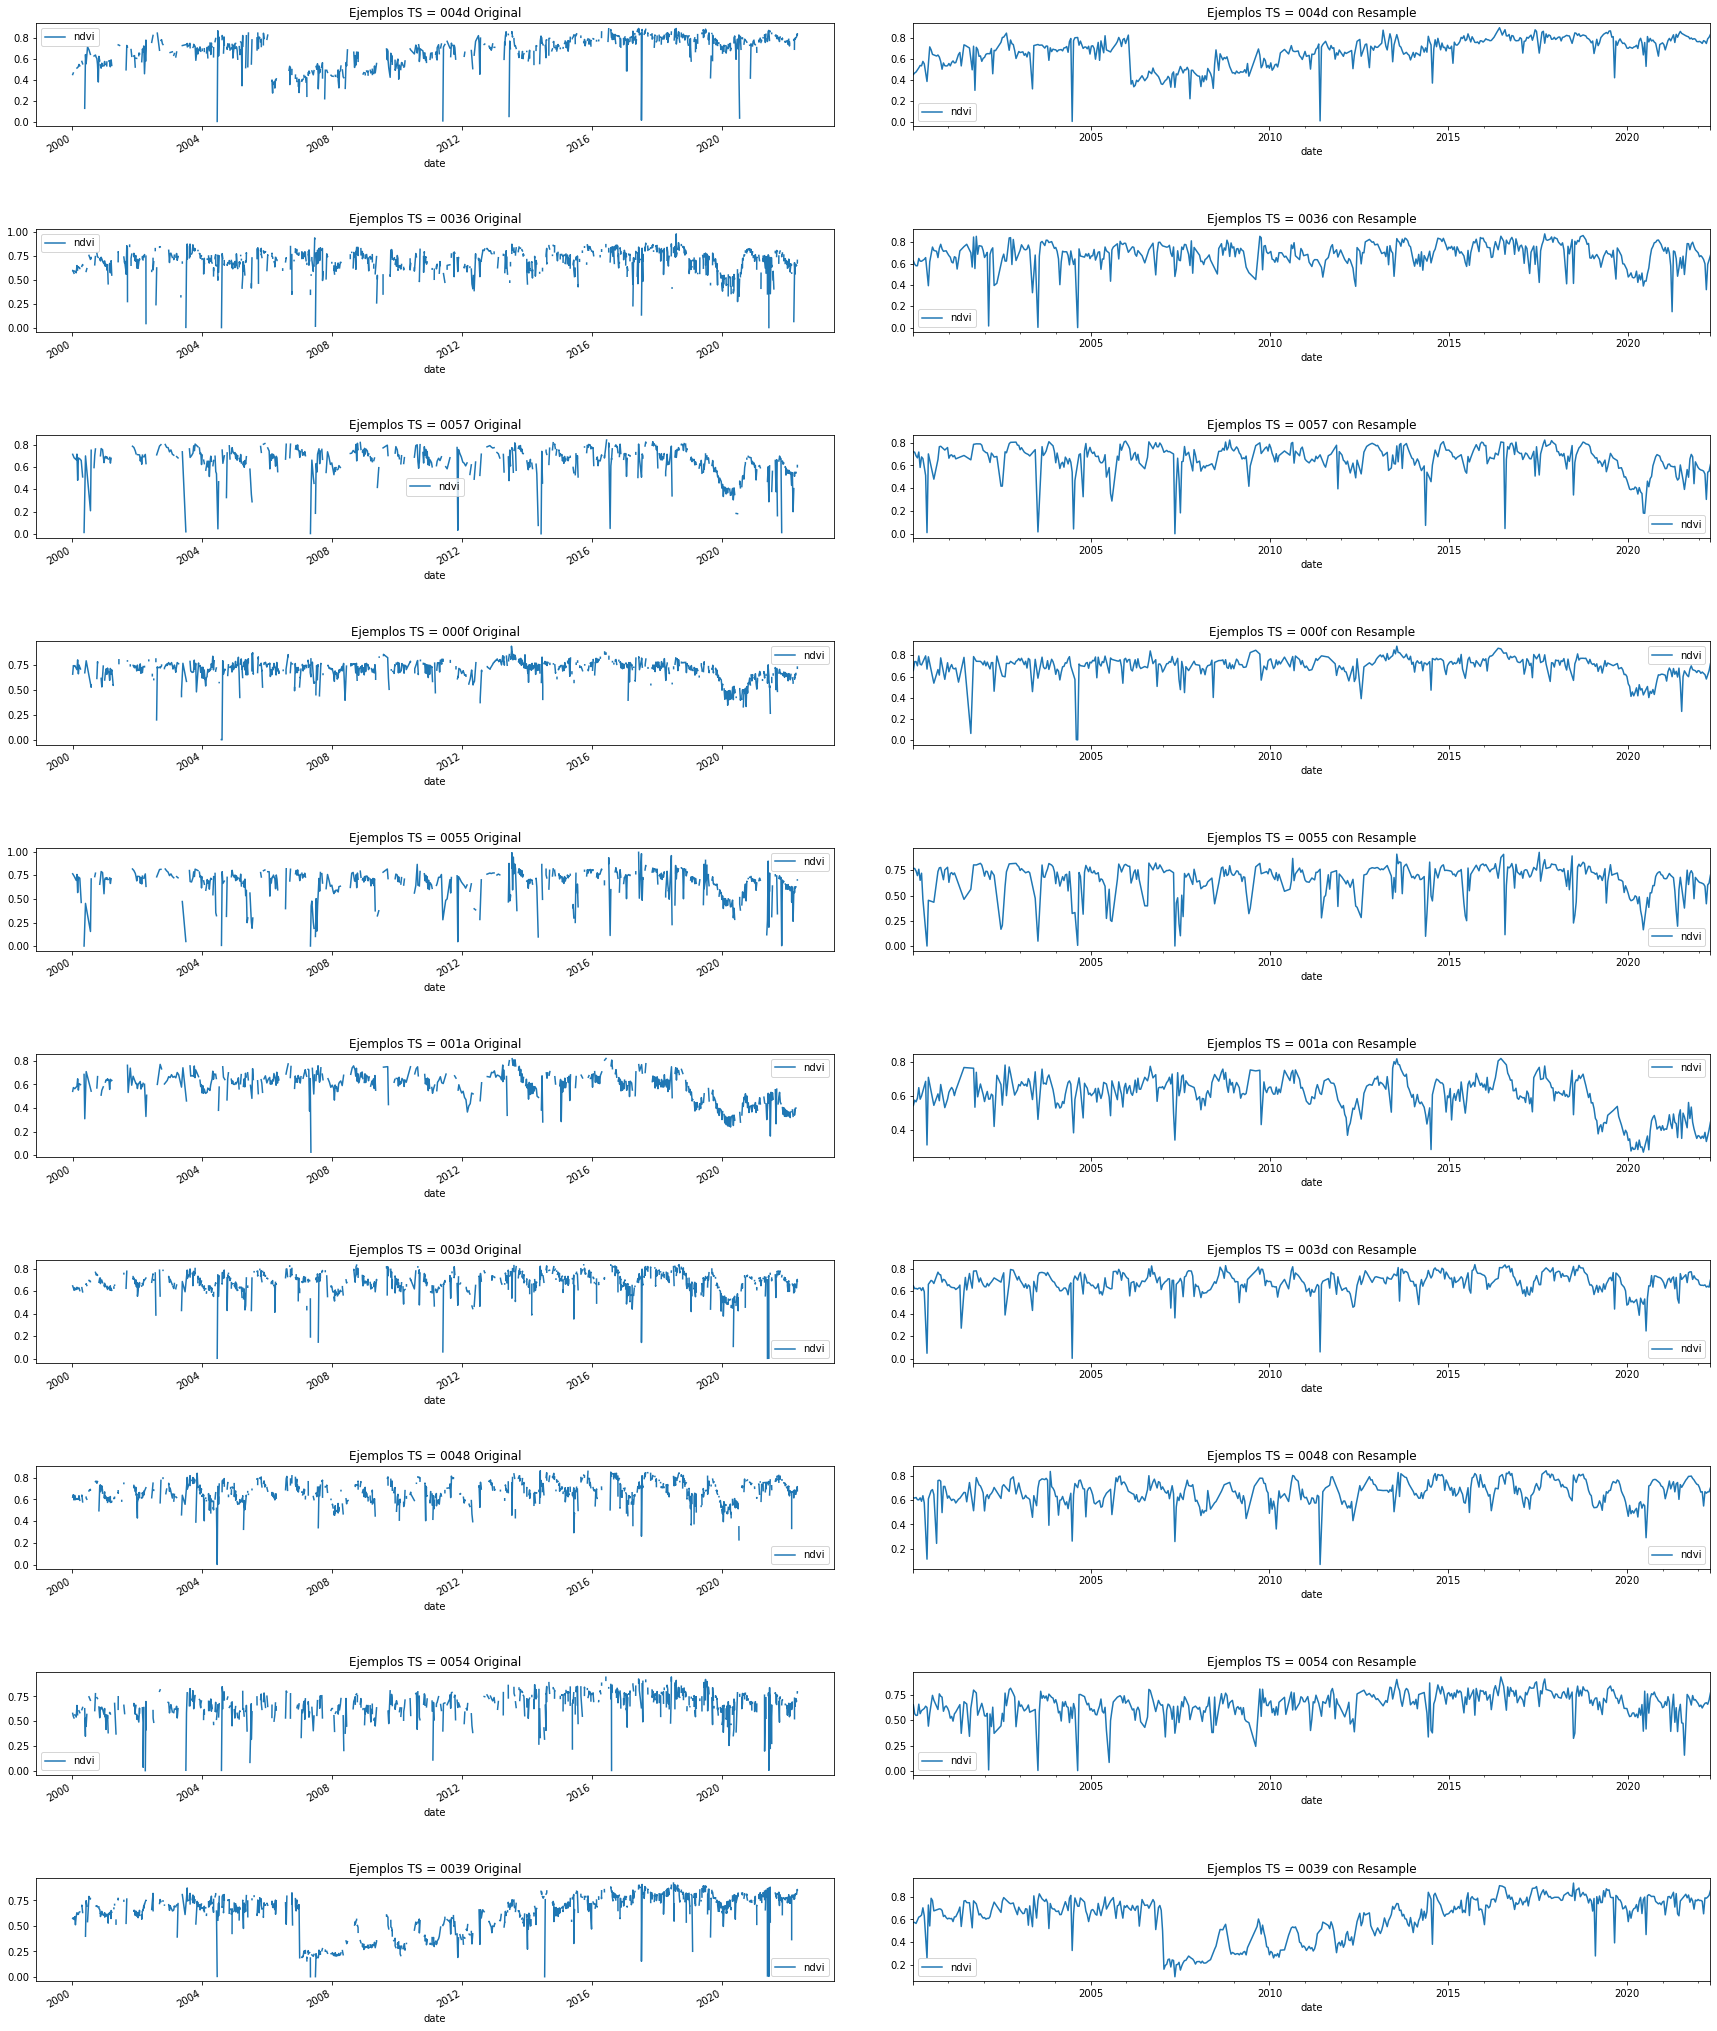

In [6]:
## Interpolación Lineal
ts_resample_2w = ts_resample_2w.interpolate()
show_original_vs_resamples(ts_df, ts_resample_2w, 10)

## Análisis de Resample Mensual

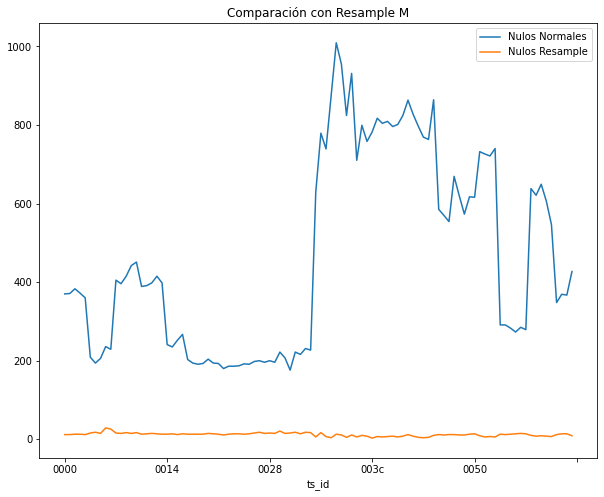

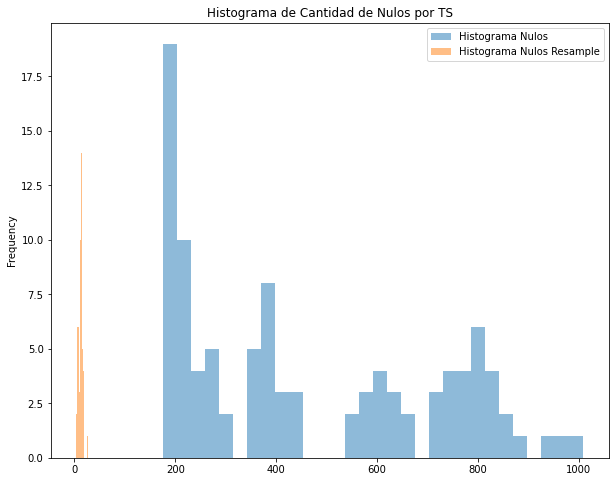

Número de TSs: 100
Largo Promedio por TS: 268.0
Promedio de Nulos por TS: 12.23


In [7]:
analyzer = AnalyzeResample(ts_df, 'M')
ts_resample_m = analyzer.analyze()
ts_stats(ts_resample_m)

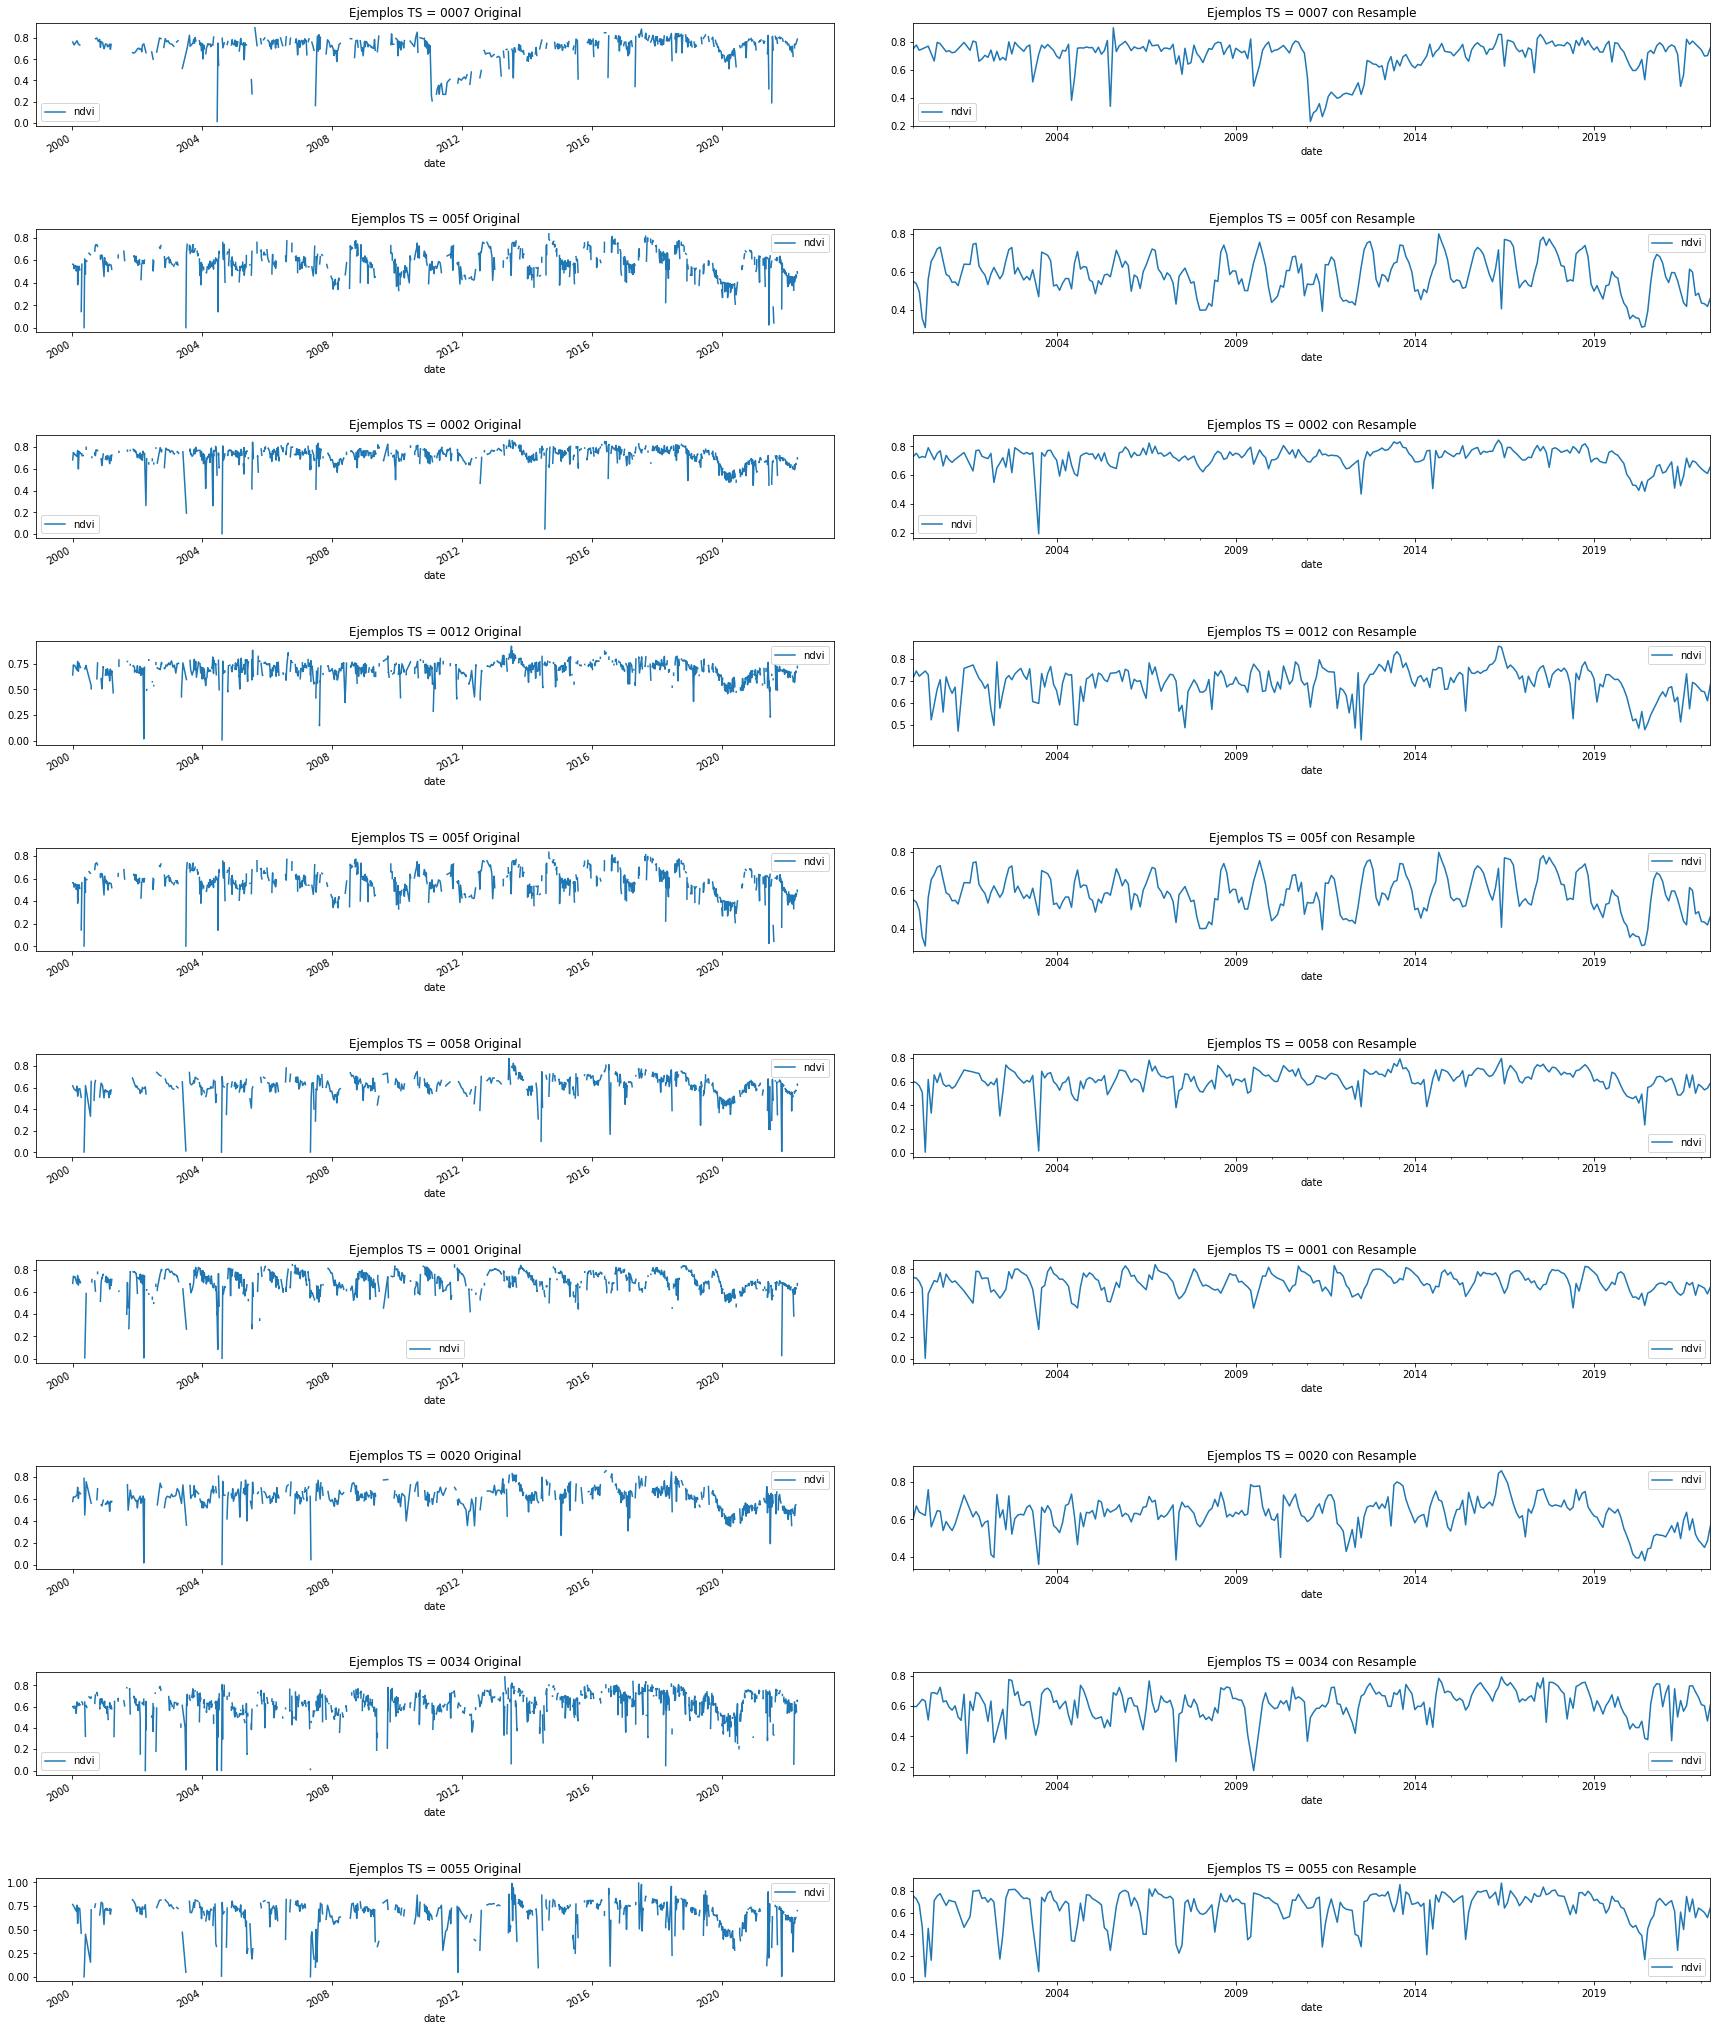

In [8]:
## Interpolación Lineal
ts_resample_m = ts_resample_m.interpolate()
show_original_vs_resamples(ts_df, ts_resample_m, 10)

In [9]:
ts_resample_m.to_csv('../data/Non_Disturbed_Resample_m.csv', index = False)
ts_resample_2w.to_csv('../data/Non_Disturbed_Resample_2w.csv', index = False)
ts_resample_w.to_csv('../data/Non_Disturbed_Resample_w.csv', index = False)

## Secuencias Dataset Original

In [10]:
SEQ_LEN = 20

Se crearon 138500 secuencias y 138500 targets.
Número de Targets Nulos 46068


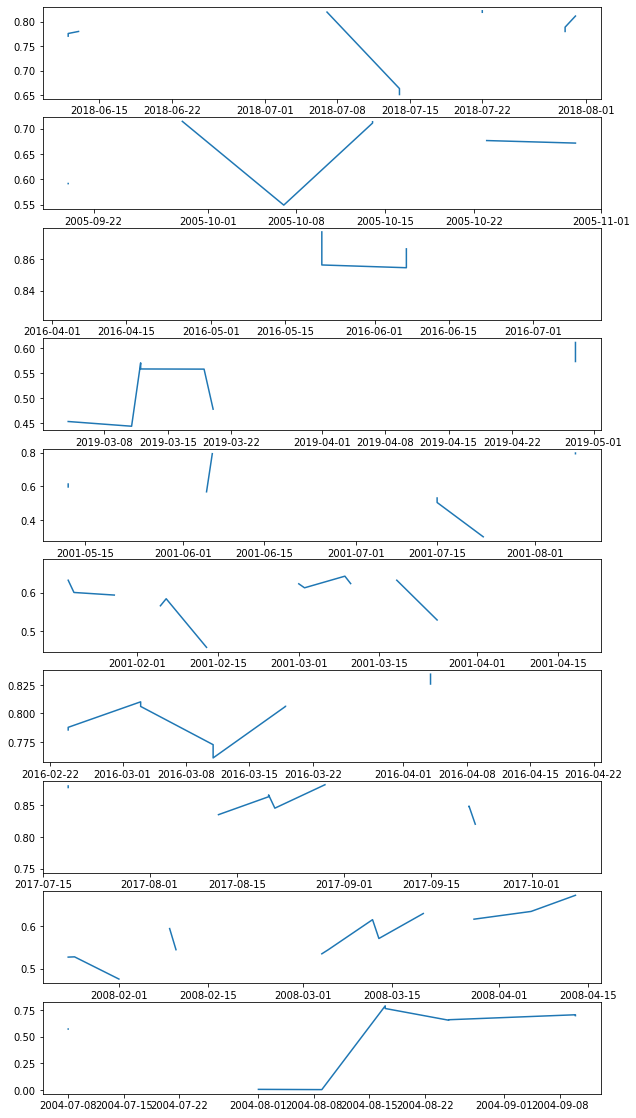

In [11]:
sequences, divisor, indices, dates, targets, dates_target, target_idx  = create_sequences(ts_df, SEQ_LEN)
print(f'Número de Targets Nulos: {np.isnan(targets).sum()}')
show_k_sequences(sequences, dates)

## Secuencias Dataset Resample Semanal

Se crearon 114571 secuencias y 114571 targets.
Número de Targets Nulos 100


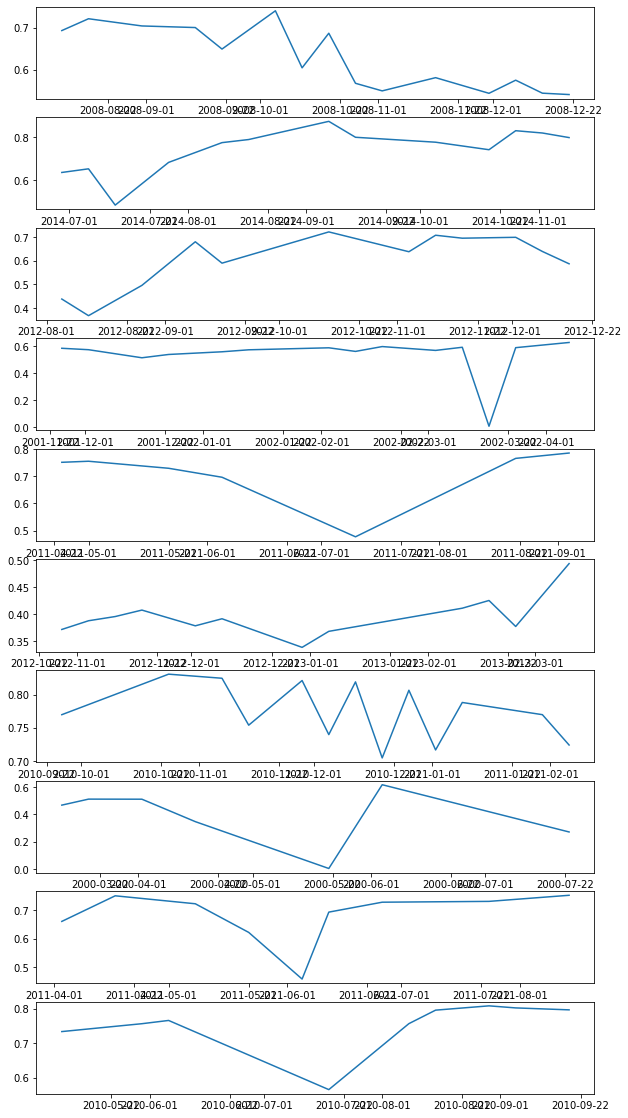

In [12]:
sequences, divisor, indices, dates, targets, dates_target, target_idx = create_sequences(ts_resample_w, SEQ_LEN)
print(f'Número de Targets Nulos: {np.isnan(targets).sum()}')
show_k_sequences(sequences, dates)

## Secuencias Dataset Resample Bisemanal

Se crearon 56400 secuencias y 56400 targets.
Número de Targets Nulos 100


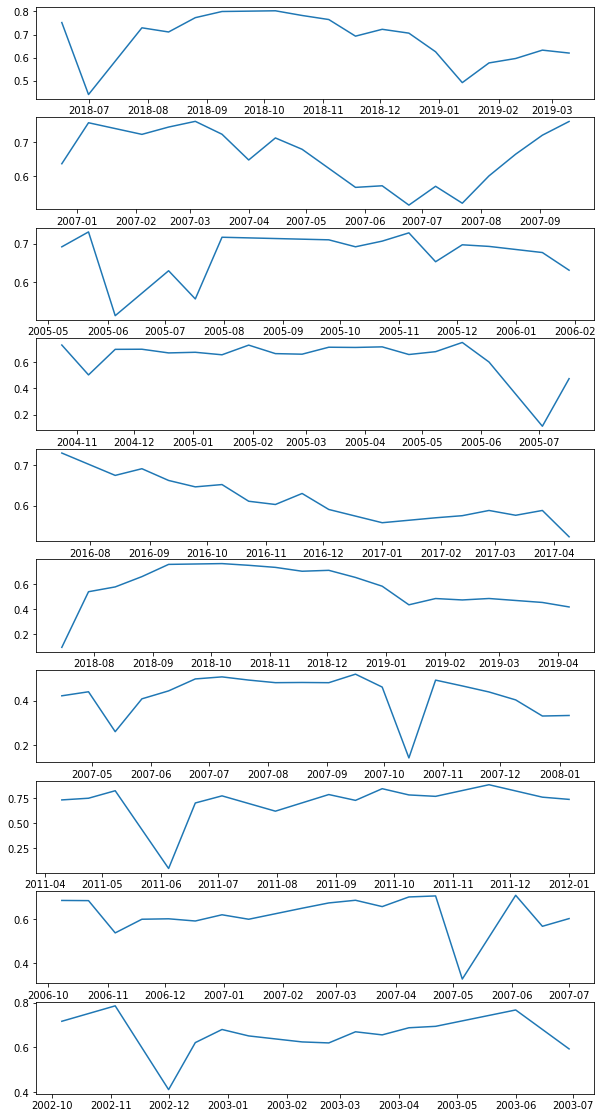

In [13]:
sequences, divisor, indices, dates, targets, dates_target, target_idx  = create_sequences(ts_resample_2w, SEQ_LEN)
print(f'Número de Targets Nulos: {np.isnan(targets).sum()}')
show_k_sequences(sequences, dates)

## Secuencias Dataset Resample Mensual

Se crearon 24900 secuencias y 24900 targets.
Número de Targets Nulos 100


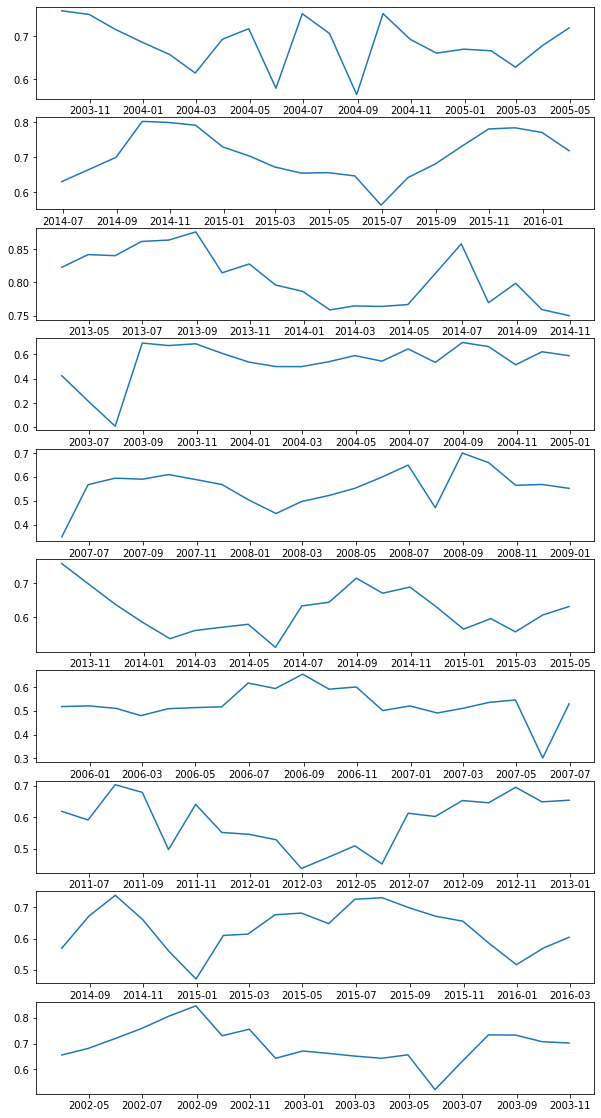

In [14]:
sequences, divisor, indices, dates, targets, dates_target, target_idx  = create_sequences(ts_resample_m, SEQ_LEN)
print(f'Número de Targets Nulos: {np.isnan(targets).sum()}')
show_k_sequences(sequences, dates)

In [15]:
# output = np.array([[1.1,2.02,3.01],[1.99,2.99,3.99],[3.01,4.02,5.02]])
# true = np.array([1,2,3,4,5])
# loss= np.zeros(5)
# divisor = np.zeros(5)

# for i in range(len(output)):
#     print(i)
#     loss[i:i+3] += np.abs(output[i]-true[i:i+3])
#     divisor[i:i+3] += np.ones(3)

# loss, divisor

# loss/divisor